In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
err_train = pd.read_csv('./train_err_data.csv')

In [3]:
model_df = pd.get_dummies(err_train['model_nm'])
fwver_df = pd.get_dummies(err_train['fwver'],prefix = 'fwver_')
errtype_df = pd.get_dummies(err_train['errtype'], prefix = "errtype_")


In [4]:
problem_train = pd.read_csv('./train_problem_data.csv')
# 불만 제기 시점

err_train = pd.read_csv('./train_err_data.csv')
quality_train = pd.read_csv('./train_quality_data.csv')
# 에러 로그 정보

err_test = pd.read_csv('./test_err_data.csv')
quality_test = pd.read_csv('./test_quality_data.csv')

sub = pd.read_csv('./sample_submission.csv')

C:\Users\OWNER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\OWNER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df = [err_train, err_test, quality_train, quality_test, problem_train]
for i in df:
    i['time'] = pd.to_datetime(
        i['time'], format='%Y%m%d%H%M%S', errors='raise')
    i['year'] = i['time'].dt.year
    i['month'] = i['time'].dt.month
    i['day'] = i['time'].dt.day
    i['hour'] = i['time'].dt.hour
    i['min'] = i['time'].dt.minute
    i['sec'] = i['time'].dt.second
    i.drop(['time'], 1, inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df:
    for var in i.columns[ i.dtypes == object ]:
        i[var] = le.fit_transform(list(i[var]))

In [7]:
err_train = err_train[err_train['month'] == 11]
err_train.drop(['year','month'],1,inplace=True)
problem_train.drop(['year','month'],1,inplace=True)

C:\Users\OWNER\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
err_test = err_test[err_test['month'] == 11]
err_test.drop(['year','month'],1,inplace=True)

- time : 연월일시분초로 다시
- object형 Column 숫자로 변환
- 문제 제기 데이터는 11월만 있고, train의 10/12월 데이터는 극소수라 11월 데이터만 사용

In [9]:
err_train.head(3)

,user_id,model_nm,fwver,errtype,errcode,day,hour,min,sec
0,10000,3,31,15,4,1,2,56,16
1,10000,3,31,12,4,1,3,3,9
2,10000,3,31,11,4,1,3,3,9


In [10]:
problem_train.head(3)

,user_id,day,hour,min,sec
0,19224,2,20,0,0
1,23664,16,14,0,0
2,15166,14,13,0,0


In [11]:
def recent_log(id):
    complaint_id = problem_train[problem_train['user_id'] == id]
    complaint_day = complaint_id['day'].iloc[0]
    complaint_hour = complaint_id['hour'].iloc[0]
    complaint_min = complaint_id['min'].iloc[0]
    complaint_sec = complaint_id['sec'].iloc[0]
    log = err_train[err_train['user_id'] == id]
    
    def time():
        print("실제 오류 접수 시간 :",complaint_hour,"시",complaint_min,"분",complaint_sec,"초")
    
    if complaint_day == 1:
        #time()
        df = log[log['day'] == complaint_day][log['hour'] < complaint_hour][log['hour'] > complaint_hour - 10][::-1]
        return df
    else:
        if complaint_hour> 12:
            #time()
            df = log[log['day'] == complaint_day][log['hour'] < complaint_hour][log['hour'] > complaint_hour - 10][::-1]
            return df
        else:
            #time()
            df = log[log['day'] == complaint_day][log['hour'] < complaint_hour][log['hour'] > complaint_hour - 10][::-1]
            return df
        ## 새벽 1시 2시 이럴 때 전날 데이터 가져오기

<ipython-input-11-fb475c65dc8f>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = log[log['day'] == complaint_day][log['hour'] < complaint_hour][log['hour'] > complaint_hour - 10][::-1]
<ipython-input-11-fb475c65dc8f>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = log[log['day'] == complaint_day][log['hour'] < complaint_hour][log['hour'] > complaint_hour - 10][::-1]
<ipython-input-11-fb475c65dc8f>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = log[log['day'] == complaint_day][log['hour'] < complaint_hour][log['hour'] > complaint_hour - 10][::-1]


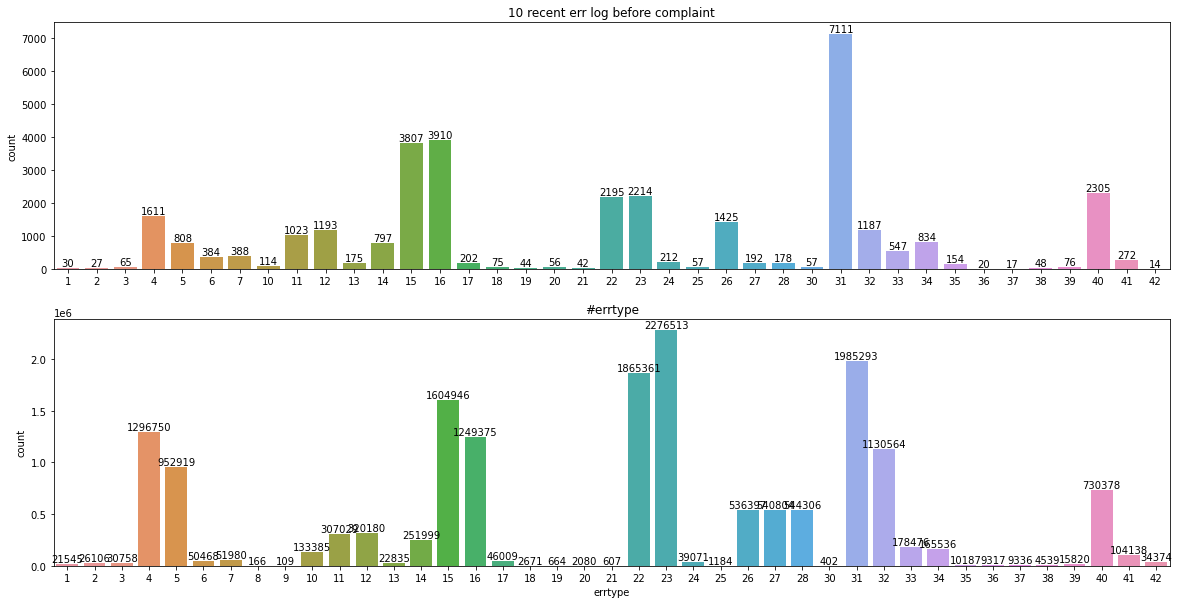

In [12]:
errlist10 = []
for i in problem_train['user_id']:
    df = recent_log(i)
    #print(i)
    try:
        errlist10.extend((df.iloc[0:10]['errtype'].values).tolist())
    except:
        pass
plt.figure(figsize=(20, 2*5))
plt.subplot(211)
cplot = sns.countplot(errlist10);plt.title("10 recent err log before complaint")
for p in cplot.patches:
    cplot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                                                   p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.subplot(212)
c1plot = sns.countplot(err_train['errtype']);plt.title("#errtype")
for p in c1plot.patches:
    c1plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                                                   p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

- 23번 에러는 접수에 집적적이지 않아보임
- 총 에러 수와의 비율로??

<ipython-input-11-fb475c65dc8f>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = log[log['day'] == complaint_day][log['hour'] < complaint_hour][log['hour'] > complaint_hour - 10][::-1]
<ipython-input-11-fb475c65dc8f>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = log[log['day'] == complaint_day][log['hour'] < complaint_hour][log['hour'] > complaint_hour - 10][::-1]
<ipython-input-11-fb475c65dc8f>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = log[log['day'] == complaint_day][log['hour'] < complaint_hour][log['hour'] > complaint_hour - 10][::-1]


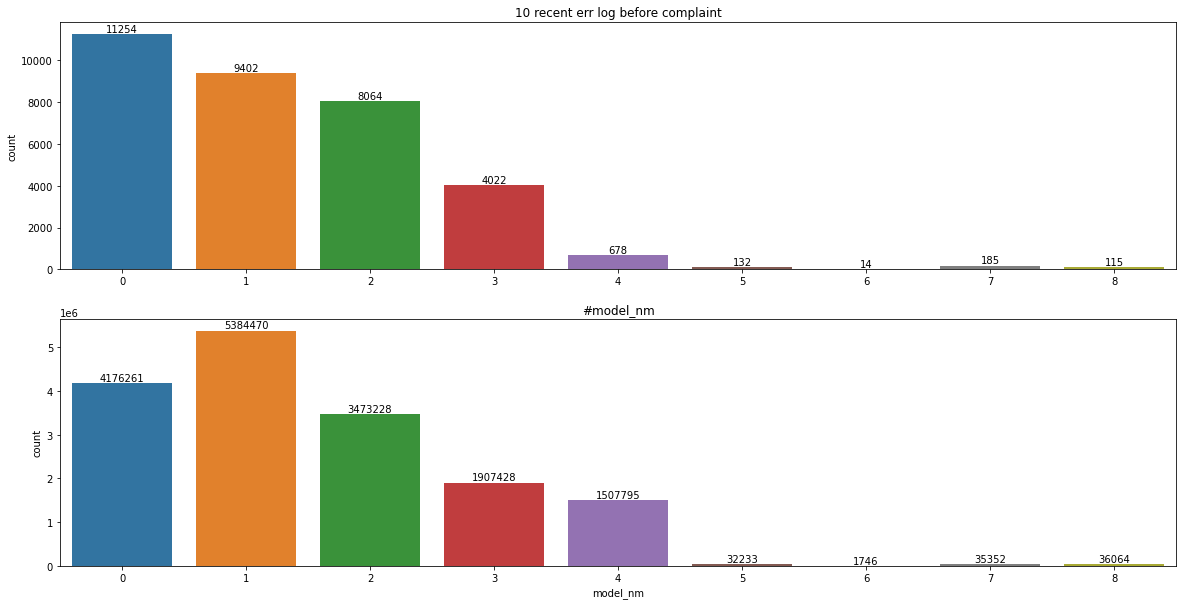

In [13]:
errlist10 = []
for i in problem_train['user_id']:
    df = recent_log(i)
    #print(i)
    try:
        errlist10.extend((df.iloc[0:10]['model_nm'].values).tolist())
    except:
        pass
plt.figure(figsize=(20, 2*5))
plt.subplot(211)
cplot = sns.countplot(errlist10);plt.title("10 recent err log before complaint")
for p in cplot.patches:
    cplot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                                                   p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.subplot(212)
c1plot = sns.countplot(err_train['model_nm']);plt.title("#model_nm")
for p in c1plot.patches:
    c1plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                                                   p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

- model 0 같은 경우 비교적 오류 접수가 많은듯??
- 1은 반대로 비교적 안정적인듯,,

<ipython-input-11-fb475c65dc8f>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = log[log['day'] == complaint_day][log['hour'] < complaint_hour][log['hour'] > complaint_hour - 10][::-1]
<ipython-input-11-fb475c65dc8f>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = log[log['day'] == complaint_day][log['hour'] < complaint_hour][log['hour'] > complaint_hour - 10][::-1]
<ipython-input-11-fb475c65dc8f>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = log[log['day'] == complaint_day][log['hour'] < complaint_hour][log['hour'] > complaint_hour - 10][::-1]


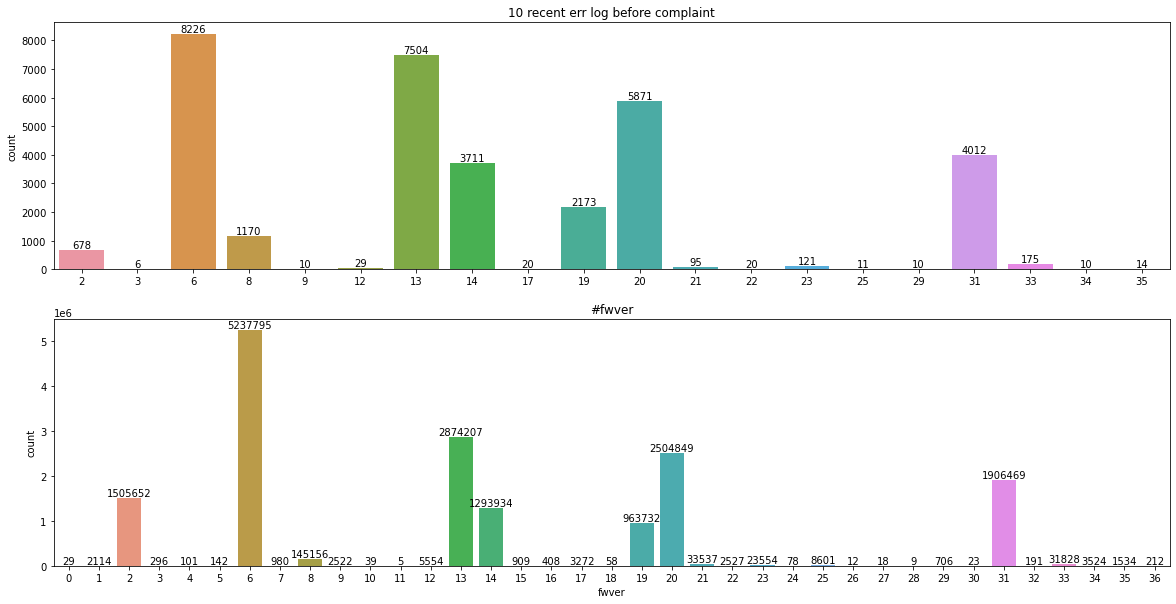

In [14]:
errlist10 = []
for i in problem_train['user_id']:
    df = recent_log(i)
    #print(i)
    try:
        errlist10.extend((df.iloc[0:10]['fwver'].values).tolist())
    except:
        pass
plt.figure(figsize=(20, 2*5))
plt.subplot(211)
cplot = sns.countplot(errlist10);plt.title("10 recent err log before complaint")
for p in cplot.patches:
    cplot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                                                   p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.subplot(212)
c1plot = sns.countplot(err_train['fwver']);plt.title("#fwver")
for p in c1plot.patches:
    c1plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                                                   p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

- 6번 펌웨어는 총 수량에 비해 안정적인듯 ? ?

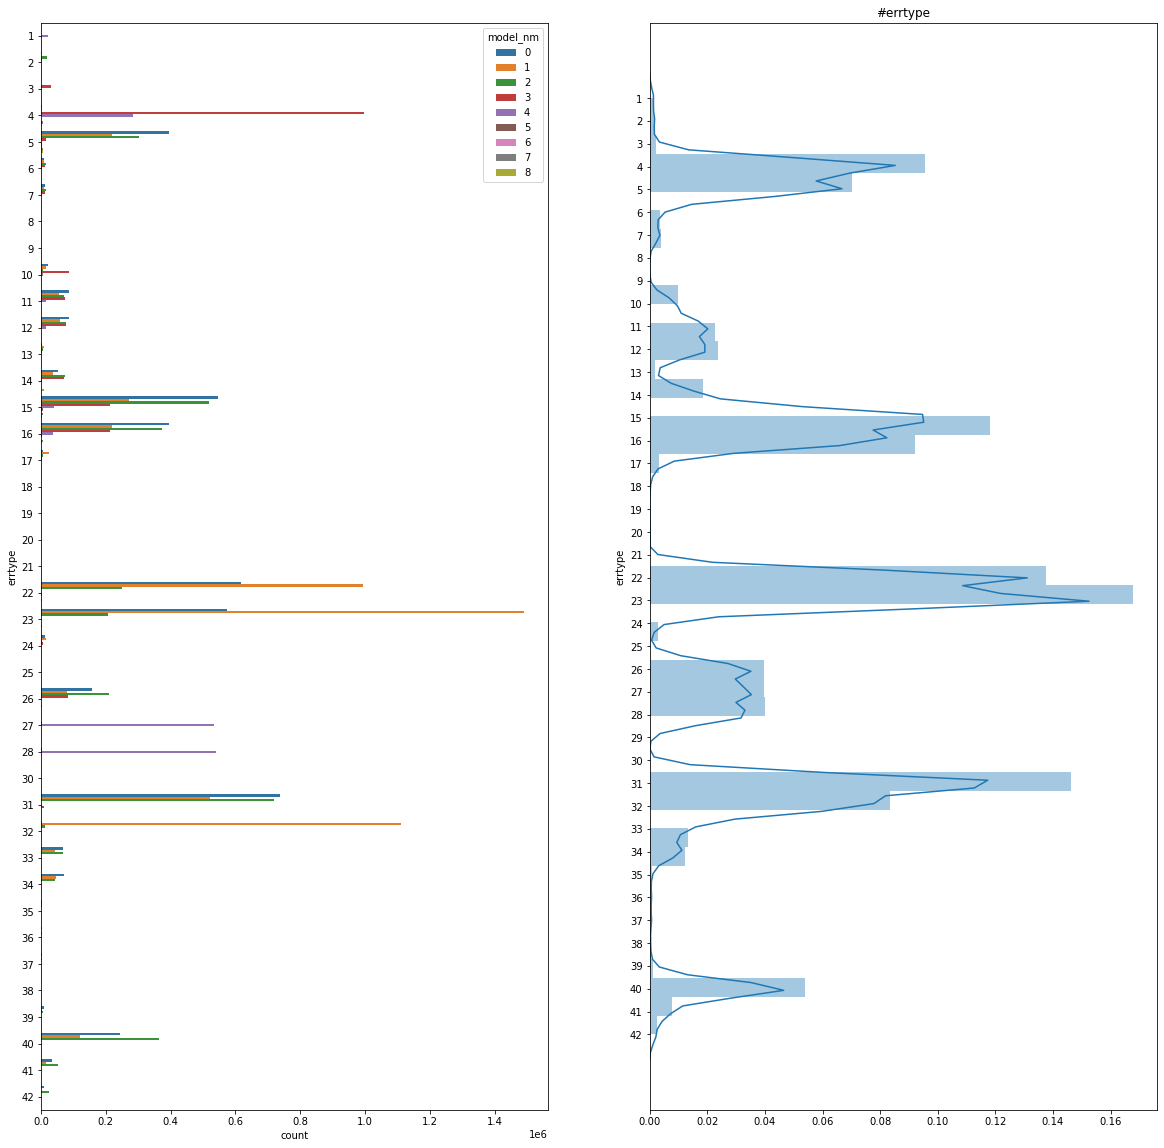

In [15]:
plt.figure(figsize = (20,20))
plt.subplot(121)
sns.countplot(y = err_train['errtype'],hue = err_train['model_nm'])
plt.subplot(122)
sns.distplot(err_train['errtype'], vertical = True, )
plt.gca().invert_yaxis()
plt.yticks(np.arange(1,43,1))
plt.title("#errtype")
plt.show()


---

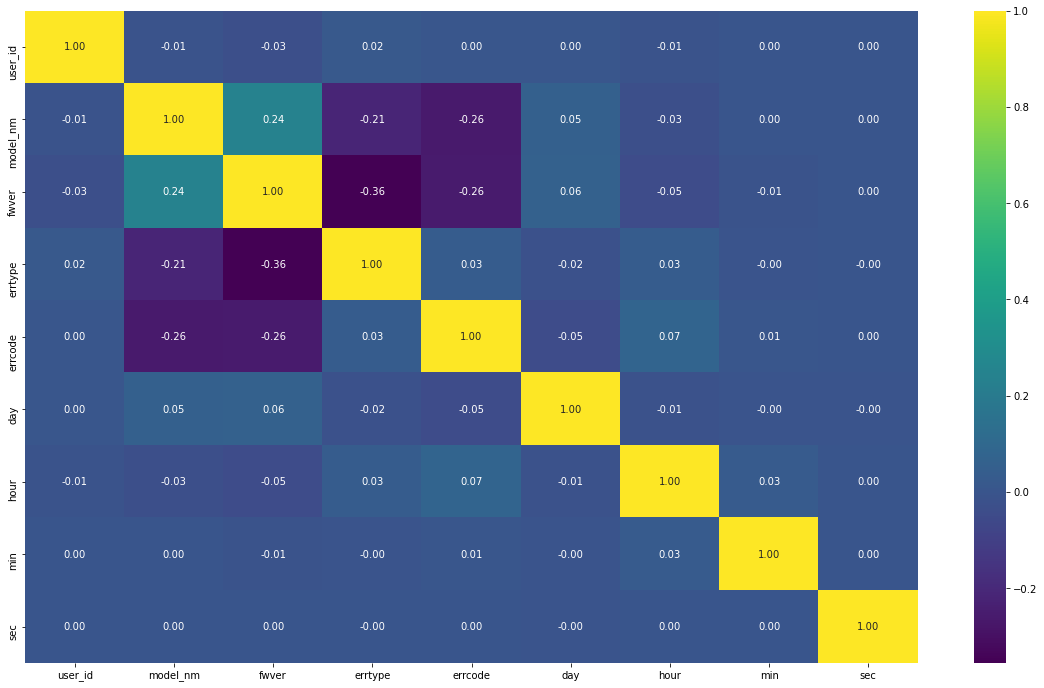

In [16]:
plt.figure(figsize = (20,12))
sns.heatmap(err_train.corr(), annot=True, cmap='viridis', fmt = "1.2f")

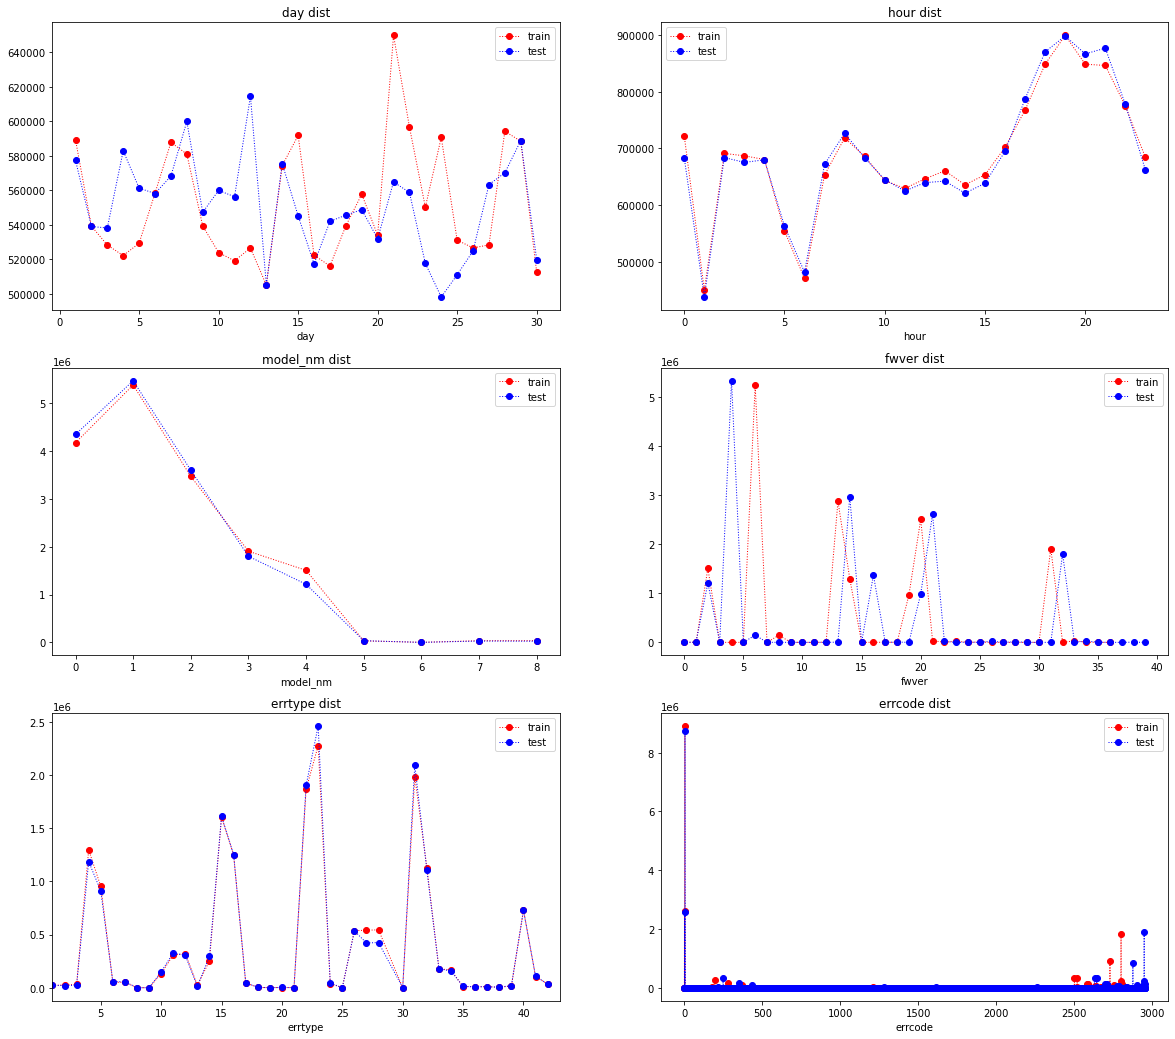

In [17]:
plt.figure(figsize=(20, 6*3))
dfs = [err_train,err_test]
variable = ['day','hour','model_nm','fwver','errtype','errcode']
colors = ['r','b']
labels = ['train','test']
for idx,var in enumerate(variable):
    plt.subplot(3,2,idx+1)
    for df,color,label in zip(dfs,colors,labels):
        df[var].value_counts().sort_index().plot(color=color, lw=1, label=label, marker = 'o', linestyle = ':')
        plt.legend();plt.xlabel(var);plt.title(var+" dist"); 
        if var == 'month': plt.xlim([1,13])
        elif var =='errtype': plt.xlim([1,43])
        
plt.show()

In [18]:
import sys
mod = sys.modules[__name__]

for i in err_train['model_nm'].unique():
    setattr(mod, 'err_train_model{}'.format(i),
            err_train[err_train['model_nm'] == i])

In [19]:
err_train['errtype'].value_counts().sort_values(ascending=False).head(10)

23    2276513
31    1985293
22    1865361
15    1604946
4     1296750
16    1249375
32    1130564
5      952919
40     730378
28     544306
Name: errtype, dtype: int64

In [20]:
err_train['model_nm'].value_counts().sort_values(ascending=False)

1    5384470
0    4176261
2    3473228
3    1907428
4    1507795
8      36064
7      35352
5      32233
6       1746
Name: model_nm, dtype: int64

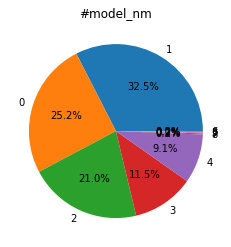

In [21]:
plt.pie(err_train['model_nm'].value_counts(), labels=err_train['model_nm'].value_counts(
).sort_values(ascending=False).index, autopct="%1.1f%%")
plt.title("#model_nm")
plt.show()


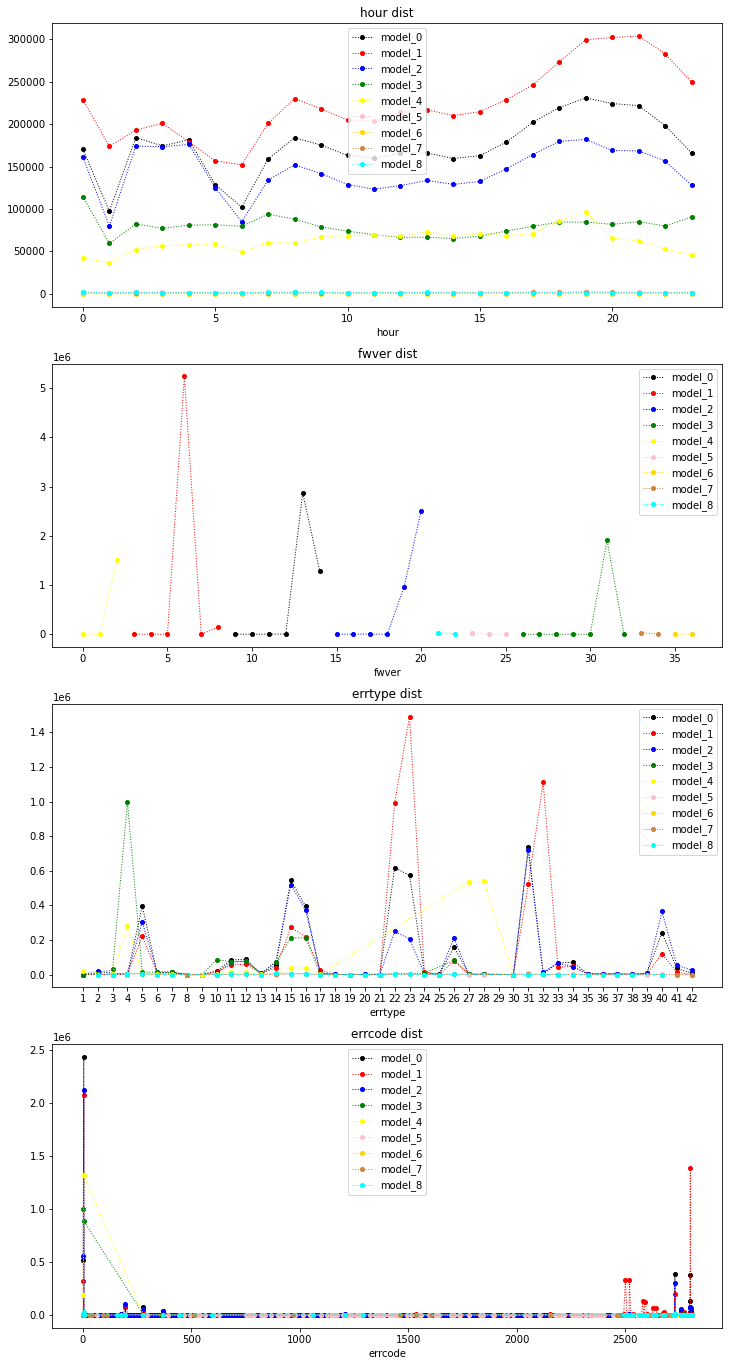

In [23]:
dfs = [err_train_model0, err_train_model1, err_train_model2, err_train_model3,
       err_train_model4, err_train_model5, err_train_model6, err_train_model7, err_train_model8]
colors = ['black', 'red', 'blue', 'green',
          'yellow', 'pink', 'gold', 'peru', 'cyan']
model_num = range(0, 9)
plt.figure(figsize=(12, 6*4))
for idx, var in enumerate(['hour', 'fwver', 'errtype', 'errcode']):
    plt.subplot(4, 1, idx+1)
    for df, color, num in zip(dfs, colors, model_num):
        df[var].value_counts().sort_index().plot(
            color=color, lw=1, label="model_{}".format(num), marker = 'o', markersize = 4, linestyle = ':')
        if var == 'errtype':
            plt.legend()
            plt.xlabel(var)
            plt.title(var+" dist")
            plt.xticks(np.arange(1, 43, 1))
        else:
            plt.legend()
            plt.xlabel(var)
            plt.title(var+" dist")
plt.show()

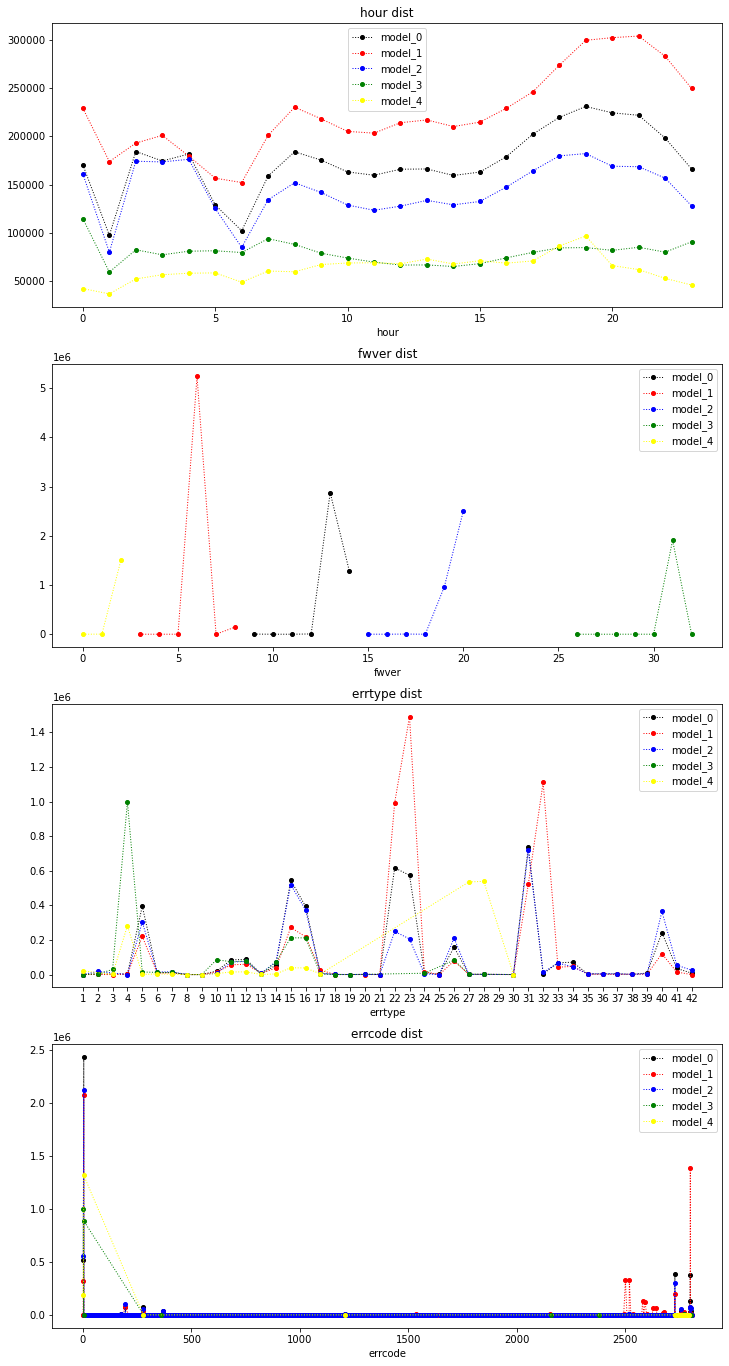

In [31]:
dfs = [err_train_model0, err_train_model1, err_train_model2, err_train_model3,
       err_train_model4]
colors = ['black', 'red', 'blue', 'green',
          'yellow']
model_num = range(0, 5)
plt.figure(figsize=(12, 6*4))
for idx, var in enumerate(['hour', 'fwver', 'errtype', 'errcode']):
    plt.subplot(4, 1, idx+1)
    for df, color, num in zip(dfs, colors, model_num):
        df[var].value_counts().sort_index().plot(
            color=color, lw=1, label="model_{}".format(num), marker = 'o', markersize = 4, linestyle = ':')
        if var == 'errtype':
            plt.legend()
            plt.xlabel(var)
            plt.title(var+" dist")
            plt.xticks(np.arange(1, 43, 1))
        else:
            plt.legend()
            plt.xlabel(var)
            plt.title(var+" dist")
plt.show()

- 시간 대에 따라 로그 수 변동은 왜ㅑ 있지 ???
- 모델 별 펌웨어는 오류와 연관은 없을듯
- 모델 타입 별 대부분 에러 타입은 비슷한게 많이 발생 but 모델 3,4는 조금 다른 분포도
- 표본 적은 모델은 확인이 힘들당..
- 에러 코드도 대부분 모델에서 비슷한 분포같아 보임,, 역시 표본수 때문에 몇 모델은 모르겠다
- 다운샘플링 ??

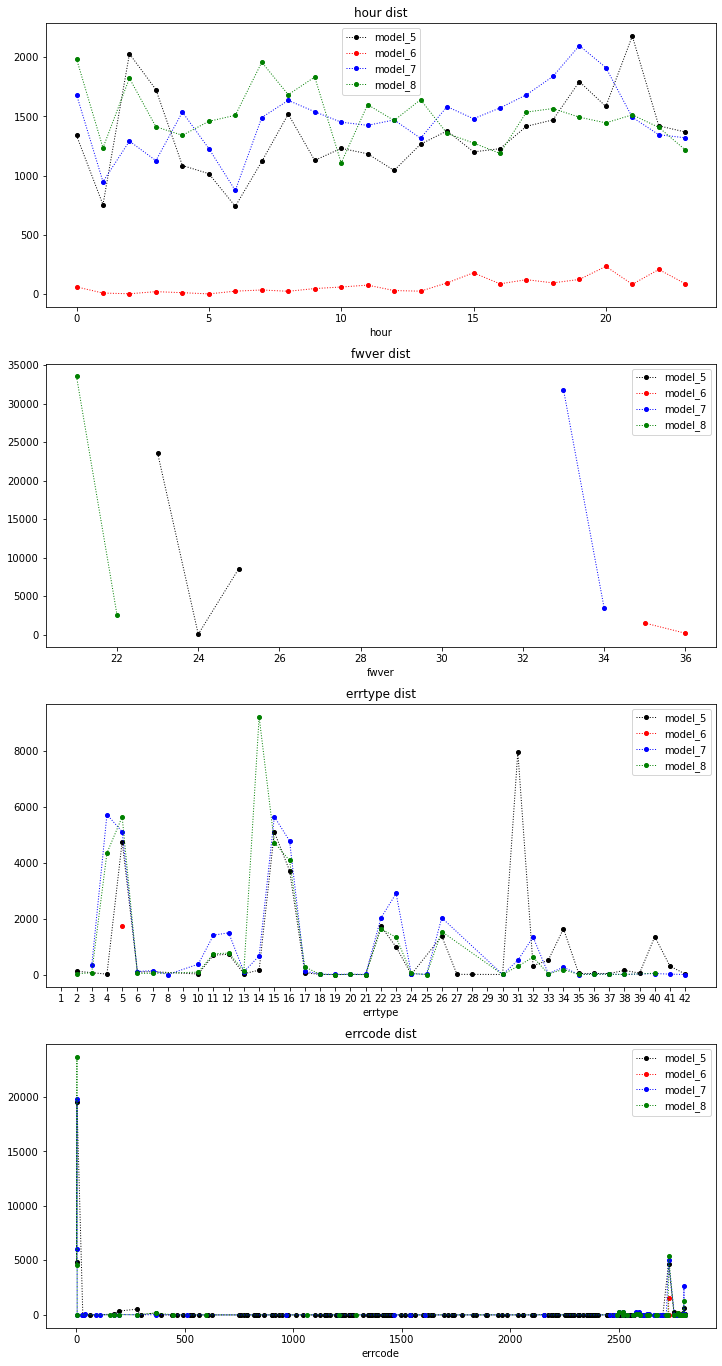

In [24]:
dfs = [err_train_model5, err_train_model6, err_train_model7, err_train_model8]
colors = ['black', 'red', 'blue', 'green']
model_num = range(5, 9)
plt.figure(figsize=(12, 6*4))
for idx, var in enumerate(['hour', 'fwver', 'errtype', 'errcode']):
    plt.subplot(4, 1, idx+1)
    for df, color, num in zip(dfs, colors, model_num):
        df[var].value_counts().sort_index().plot(
            color=color, lw=1, label="model_{}".format(num), marker = 'o', markersize = 4, linestyle = ':')
        if var == 'errtype':
            plt.legend()
            plt.xlabel(var)
            plt.title(var+" dist")
            plt.xticks(np.arange(1, 43, 1))
        else:
            plt.legend()
            plt.xlabel(var)
            plt.title(var+" dist")
plt.show()

## 표본이 적은 model --> 학습 제대로 안될듯
---

In [25]:
print(err_train['fwver'].unique())
print(err_train['errtype'].unique())
print(err_train['errcode'].unique())

[31 19 20 13 14  6 17  8 33 34  1 12  2 23 25 18 21 35 24 22 36 11  0 29
 16  5  9 15  7 26 32 30 10  3 28  4 27]
[15 12 11 16  4 26 10 14  3 13  6  7 27 28 31 33 22 41  5 40 34 37 36 23
 18 20 19 21 42 24 25 17 38 39 35 32 30  2  1  9  8]
[   4    2  279 ... 1403 1192  344]


In [26]:
print("fwver unique 수 :", err_train['fwver'].nunique())
print("errtype unique 수 :", err_train['errtype'].nunique())
print("errcode unique 수 :", err_train['errcode'].nunique())

fwver unique 수 : 37
errtype unique 수 : 41
errcode unique 수 : 2806


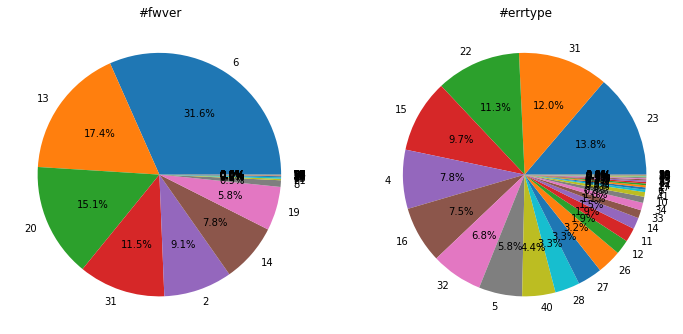

In [27]:
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.pie(err_train['fwver'].value_counts(), labels=err_train['fwver'].value_counts(
).sort_values(ascending=False).index, autopct="%1.1f%%")
plt.title("#fwver")
plt.subplot(122)
plt.pie(err_train['errtype'].value_counts(), labels=err_train['errtype'].value_counts(
).sort_values(ascending=False).index, autopct="%1.1f%%")
plt.title("#errtype")
plt.show()

In [28]:
problem_train['hour'].unique()

array([20, 14, 13, 21, 15, 11, 16, 12, 23, 18, 22, 17, 19,  1,  0,  5,  9,
        2, 10,  4,  8,  3,  7,  6], dtype=int64)

In [29]:
problem_train['user_id'].nunique()

5000

In [30]:
problem_train['user_id'].shape

(5429,)

## 생각해볼만한
- 어떤 펌웨어에서 어떤 errtype/errcode가 불만접수
- 어떤 errcode / errtype이 치명적인가    
: errcode 1이 엄청 많은데, 가벼운 에러로그일 수도!
- 실제 오류접수 시간대와 비교해서 어떤 이벤트가 접수로 이어졌는지 볼 필요,..



---